In [2]:
# Import saved data from the data mining part,
# will not use now the Year and Runtime variables
import pandas as pd
import matplotlib as pyplot
import rs
%matplotlib inline

df       = pd.read_csv('scrapped/final.csv',index_col=0)
target   = pd.read_csv('scrapped/target.csv',index_col=0)
df = df.drop('Year',1)
df = df.drop('Runtime',1)
df.describe()

,Dutifulness,Cooperation,Self-consciousness,Orderliness,Achievement striving,Self-efficacy,Activity level,Self-discipline,Excitement-seeking,Cautiousness,...,Imagination,Artistic interests,Depression,Anger,Trust,Cheerfulness,Liberalism,Words,DiversityW,Verb/Noun
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.405171,0.536888,0.179561,0.595121,0.388911,0.361131,0.289561,0.549442,0.314810,0.554877,...,0.297910,0.548056,0.391515,0.286393,0.181446,0.571733,0.286637,7925.342105,0.221573,1.271617
std,0.173322,0.202869,0.167255,0.167645,0.132796,0.136278,0.135861,0.196325,0.150562,0.210597,...,0.227058,0.239250,0.195561,0.187393,0.137766,0.230301,0.221222,3494.329726,0.054025,0.271840
min,0.050043,0.117619,0.010279,0.270391,0.159289,0.166150,0.075501,0.159373,0.101969,0.108675,...,0.014980,0.192982,0.074009,0.052698,0.018033,0.065383,0.027618,2534.000000,0.131209,0.697207
25%,0.309523,0.395504,0.055712,0.475460,0.272155,0.260853,0.202516,0.407738,0.221930,0.437821,...,0.136234,0.357692,0.230395,0.154125,0.071042,0.406340,0.104538,5350.000000,0.173229,1.107971
50%,0.420914,0.538981,0.104142,0.622653,0.401625,0.331722,0.277585,0.589972,0.290877,0.604645,...,0.239069,0.498901,0.405362,0.255017,0.164813,0.605660,0.255167,7412.000000,0.228621,1.295466
75%,0.513643,0.667741,0.267631,0.716277,0.469071,0.457375,0.328543,0.681915,0.375973,0.723535,...,0.413769,0.766492,0.528237,0.365132,0.229145,0.752660,0.374475,9927.000000,0.247554,1.403427
max,0.775432,0.894157,0.698873,0.898338,0.684154,0.706618,0.671766,0.869719,0.699644,0.841756,...,0.871380,0.962150,0.816066,0.932604,0.629718,0.953146,0.879719,16788.000000,0.374901,2.204380


In [3]:
from sklearn import preprocessing
# Start by preprocessing the data, here the columns are scaled to
# have mean = 0 and std = 1, many machine learning algorithms
# like support vector machines and k-nn are susceptible to
# imbalances in the predictor factors
dfP = preprocessing.scale(df)

In [4]:
# Use RandomForest Regressor to understand the importance of each
# feature in the dataset and its impact in predicting the
# target values, imdbRatings
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
clf = RandomForestRegressor(n_estimators=1000)
clf.fit(dfP,pd.Series(target['imdbRating']).ravel())

imp  = []
for i in range(len(df.columns)):
    imp.append([clf.feature_importances_[i],df.columns[i]])

In [5]:
# Although the dataset is not yet big enough to draw conclusions, it is 
# peculiar to find such dominant 1st place feature, the Ratio of 
# Verbs/Nouns with almost 30%
top = pd.DataFrame(sorted(imp,reverse=True),columns=['importance','feature']).transpose()
top.columns = top.ix['feature']
top = top.drop('feature',0)
top

feature,Verb/Noun,Immoderation,Artistic interests,Activity level,Imagination,Adventurousness,Liberalism,DiversityW,Achievement striving,Assertiveness,...,Anger,Cooperation,Depression,Trust,Morality,Cautiousness,Cheerfulness,Dutifulness,Anxiety,Altruism
importance,0.27475,0.0601676,0.0568833,0.0511599,0.0487502,0.0397939,0.0343908,0.0317875,0.030548,0.0292546,...,0.0126527,0.0121634,0.0117513,0.0102866,0.0100144,0.00796941,0.00744626,0.00683416,0.0049963,0.00373818


In [6]:
# There is a high impact of some variables and a relatively modest from others
# This parameters may become importante as the dataset increases, but for now
# keep only the first ones
ndf = df[top.columns[:6]]

[ 0.39432995  0.28649688  0.18902082  0.06214476  0.03917004  0.02883755]
1.0 


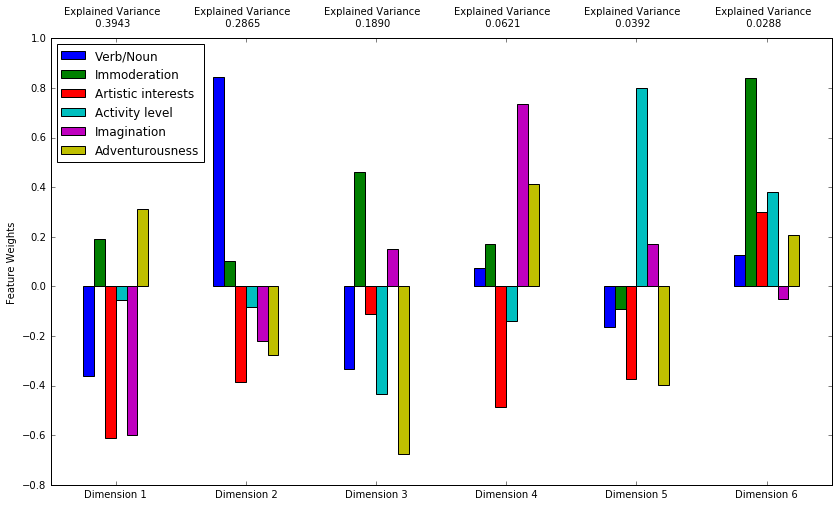

In [7]:
# PCA or principal component analysis can help us discover underlying actors
# on the evident features, associations between factors that may come from 
# common roots
from sklearn.decomposition import PCA
pca = PCA(n_components=6,whiten=True)
pca.fit(ndf)
print pca.explained_variance_ratio_
print '{} '.format(sum(pca.explained_variance_ratio_))
pca_results = rs.pca_results(ndf,pca)

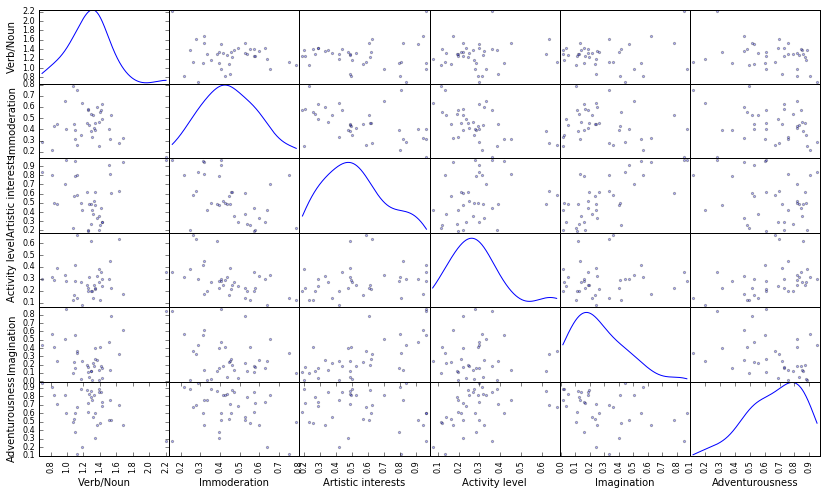

In [8]:
# Data visualization of the top 5 features affecting data regression
# The dataset is still small to draw conclusions
# Some patters if febble emerge
pd.scatter_matrix(ndf, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

In [86]:
# Regression, see if we can predict the ratings with the features
# Even with a reduced number of features and training examples
import numpy as np
index = sorted(np.random.choice(range(38),size=29,replace=False))
nindex = []
for i in range(ndf.shape[0]):
    if i not in index:
        nindex.append(i)

ndf = df[top.columns[:6]]

clf = RandomForestRegressor(n_estimators=10)
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
rfrpred = clf.predict(ndf.ix[nindex])

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
lrpred = clf.predict(ndf.ix[nindex])

from sklearn.svm import SVR
clf = SVR()
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
svrpred = clf.predict(ndf.ix[nindex])

from sklearn.ensemble import AdaBoostRegressor as ABR
clf = ABR()
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
abrpred = clf.predict(ndf.ix[nindex])

rmse = 0.
x = []
for i,j,k,l,m in zip(rfrpred,lrpred,svrpred,abrpred,target['imdbRating'].ix[nindex]):
    ensemble = (i+j+k+l)/4.
    rmse += (ensemble-m)**2
    #print 'RF: {}, LR: {}, SVM: {}, AdaBoost: {}, Target: {}'.format(i,j,k,l,m)
    print 'Ensemble: {}, Target: {}'.format(ensemble,m)
    
print 'Root Mean Square Error: {}'.format((rmse/9.)**0.5)

Ensemble: 5.80962665075, Target: 6.0
Ensemble: 6.10829650468, Target: 5.6
Ensemble: 7.13590366492, Target: 5.3
Ensemble: 7.15284704571, Target: 6.9
Ensemble: 7.36985320665, Target: 7.4
Ensemble: 7.81929699508, Target: 6.4
Ensemble: 6.49318929522, Target: 7.0
Ensemble: 8.16087591022, Target: 9.0
Ensemble: 8.47848187133, Target: 8.7
Root Mean Square Error: 0.866310865644


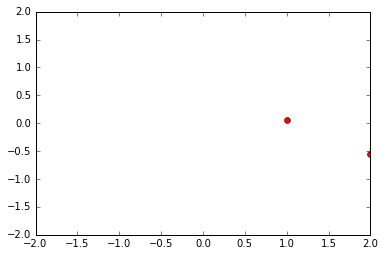

In [17]:
import matplotlib.pyplot as plt
plt.plot(x, 'ro')
plt.axis([-2,2,-2,2])
plt.show()